In [47]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn_pandas
%matplotlib inline 

In [236]:
data_1 = pd.read_csv('opel_corsa_01.csv', index_col=0, sep=",")
data_2 = pd.read_csv('opel_corsa_02.csv', index_col=0, sep=",")
data_3 = pd.read_csv('peugeot_207_01.csv', index_col=0, sep=",")
data_4 = pd.read_csv('peugeot_207_02.csv', index_col=0, sep=",")

In [237]:
data = pd.concat([data_1, data_2, data_3, data_4])
data.reset_index(drop=True, inplace=True)
data.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [238]:
data.shape

(23775, 17)

In [239]:
data.isnull().sum()

AltitudeVariation            0
VehicleSpeedInstantaneous    9
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   5
EngineCoolantTemperature     5
ManifoldAbsolutePressure     5
EngineRPM                    5
MassAirFlow                  5
IntakeAirTemperature         5
VerticalAcceleration         0
FuelConsumptionAverage       5
roadSurface                  0
traffic                      0
drivingStyle                 0
dtype: int64

In [240]:
data = data.dropna()

In [241]:
data.isnull().sum()

AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
roadSurface                  0
traffic                      0
drivingStyle                 0
dtype: int64

In [242]:
le = preprocessing.LabelEncoder()
data['roadSurface'] = le.fit_transform(data['roadSurface'])
data['traffic'] = le.fit_transform(data['traffic'])
data['drivingStyle'] = le.fit_transform(data['drivingStyle'])

In [243]:
# Normalised y values 
print(f"roadSurface values: 'FullOfHolesCondition', 'SmoothCondition', 'UnevenCondition': {data.roadSurface.unique()}")
print(f"traffic values: 'HighCongestionCondition', 'LowCongestionCondition', 'NormalCongestionCondition': {data.traffic.unique()}")
print(f"drivingStyle values: 'AggressiveStyle', 'EvenPaceStyle': {data.drivingStyle.unique()}")

roadSurface values: 'FullOfHolesCondition', 'SmoothCondition', 'UnevenCondition': [1 2 0]
traffic values: 'HighCongestionCondition', 'LowCongestionCondition', 'NormalCongestionCondition': [1 2 0]
drivingStyle values: 'AggressiveStyle', 'EvenPaceStyle': [1 0]


In [330]:
data_input = data.drop(columns=['roadSurface', 'drivingStyle','traffic'])
data_input = data_input.dropna(how='any',axis=0) 
Y = data['roadSurface']

In [331]:
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(data_input.columns, StandardScaler())])
scaled_features = mapper.fit_transform(data_input.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=data_input.index, columns=data_input.columns)
scaled_features_df

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
0,-0.973682,-0.383326,-0.821584,-0.275565,-1.037150,-0.206042,-1.203353,-0.180112,-0.449605,0.534780,-0.024353,0.047389,-0.166678,0.939816
1,-0.878058,-0.429875,-0.808247,-0.281967,-0.657791,-0.146859,-0.982561,-0.180112,-0.596252,0.349665,-0.144042,-0.136066,-0.171182,0.943810
2,-0.591214,-0.469773,-0.795658,-0.292722,-0.562952,-0.161639,-0.349623,-0.180112,-0.596252,0.193962,-0.432948,-0.227794,-0.172308,0.927746
3,0.173750,-0.483073,-0.791162,-0.297566,-0.183594,-0.169092,-0.467379,-0.116340,-0.547370,0.230292,-0.395803,-0.319521,-0.158766,0.916235
4,0.173721,-0.443174,-0.786093,-0.300286,0.575121,-0.181409,-0.629293,-0.116340,-0.547370,0.382536,-0.426757,-0.227794,-0.153136,0.897309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23770,0.604015,-0.290910,-0.329201,-0.627904,1.522303,-0.449027,-0.408501,0.648927,-0.009663,0.464713,0.456469,0.139116,-0.181922,-0.128717
23771,0.938678,-0.237754,-0.330165,-0.628890,0.764194,-0.449785,-0.938403,0.648927,-0.449605,-1.298201,0.174786,0.139116,-0.191335,-0.127058
23772,0.986490,-0.264332,-0.331128,-0.629586,-0.372970,-0.536949,2.299886,0.648927,-0.449605,-0.402903,-0.673359,0.047389,-0.167342,-0.135387
23773,1.129919,-0.264332,-0.334017,-0.633537,0.006085,-0.471260,1.608069,0.585155,-0.156310,-0.402903,-0.117215,-0.044339,-0.155908,-0.135489


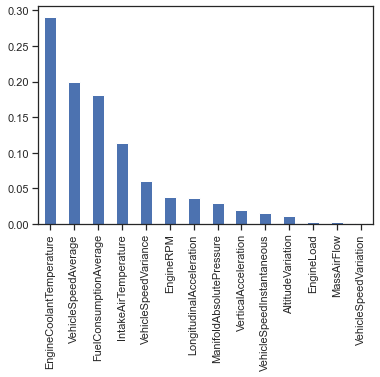

In [332]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(data_input, Y)
# get importance
importance = model.feature_importances_

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data_input.columns)
feat_importances.nlargest(14).plot(kind='bar')
plt.show()

In [333]:
data_input_reduced = data_input[[
    'EngineCoolantTemperature', \
    'VehicleSpeedAverage', \
    'FuelConsumptionAverage',  \
    'IntakeAirTemperature', \
#     'VehicleSpeedVariance',  \
#     'VehicleSpeedInstantaneous', \
#     'VehicleSpeedVariation', \
#     'LongitudinalAcceleration', \
#     'EngineLoad', \
#     'ManifoldAbsolutePressure', \
#     'EngineRPM', 
#     'MassAirFlow', \
#     'VerticalAcceleration', \
#     'AltitudeVariation' \
]]

Y_df = pd.DataFrame(Y)
input_output = pd.concat([data_input_reduced, Y_df], axis=1, ) 
input_output

,EngineCoolantTemperature,VehicleSpeedAverage,FuelConsumptionAverage,IntakeAirTemperature,roadSurface
0,68.0,13.223501,19.497335,24.0,1
1,68.0,13.638919,19.515722,22.0,1
2,68.0,14.031043,19.441765,21.0,1
3,69.0,14.171073,19.388769,20.0,1
4,69.0,14.328954,19.301638,21.0,1
...,...,...,...,...,...
23770,81.0,28.559999,14.578003,25.0,1
23771,81.0,28.529999,14.585642,25.0,1
23772,81.0,28.499999,14.547294,24.0,1
23773,80.0,28.409999,14.546828,23.0,1


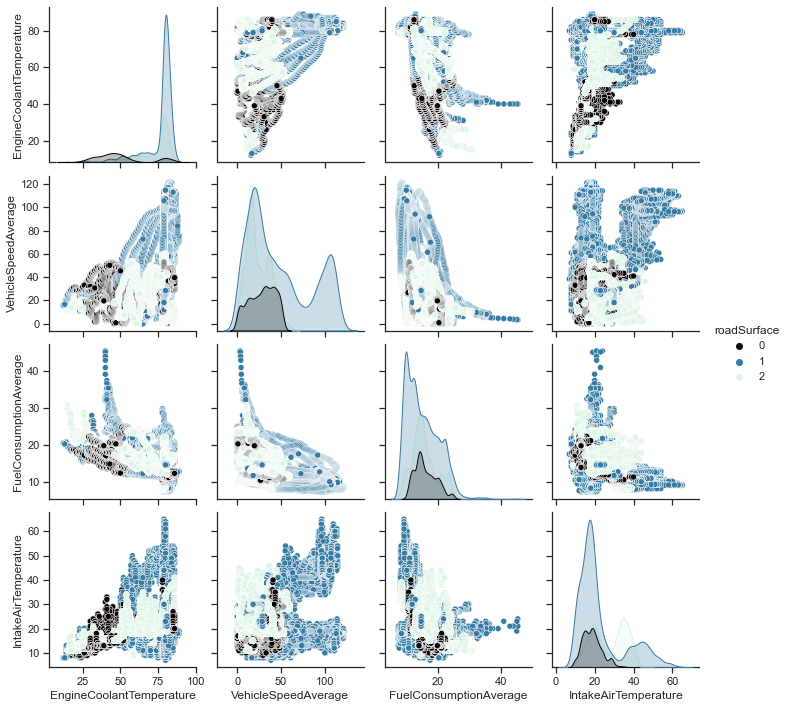

In [323]:
sns.set_theme(style="ticks")

sns.pairplot(input_output, hue='roadSurface', palette='mako')


In [335]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_input_reduced,Y, test_size=0.2) # 70% training and 30% test

In [336]:
X_train

,EngineCoolantTemperature,VehicleSpeedAverage,FuelConsumptionAverage,IntakeAirTemperature
8514,60.0,20.146103,21.258413,18.0
19645,54.0,13.455000,23.936859,20.0
21362,67.0,38.804999,14.466671,20.0
6987,83.0,98.092158,11.807935,21.0
20691,30.0,14.910000,22.372278,16.0
...,...,...,...,...
6139,69.0,23.249834,16.000486,10.0
15966,46.0,42.224999,14.136004,17.0
13604,79.0,25.424999,11.113198,35.0
10166,69.0,21.211955,18.816046,18.0


## KNN Analysis

In [337]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [338]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:2.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.988


## SVM Analysis

In [294]:
#Import svm model
from sklearn import svm

#Create a svm Classifierv
clf = svm.SVC(C=20, kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [295]:
print("Accuracy: {:2.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.643
